In [3]:
from pyvis.network import Network
import networkx as nx
import pandas as pd
import math
import numpy as np
from scipy import stats
import pandas as pd
import igraph as ig
import pylab 

import powerlaw


import datashader as ds
import datashader.transfer_functions as tf
from datashader.layout import random_layout, circular_layout, forceatlas2_layout
from datashader.bundling import connect_edges, hammer_bundle
import matplotlib.pyplot as plt
# from py3plex.core import multinet

from itertools import chain
import random
import seaborn as sn

In [25]:
def get_type_node(G, id):
    
    print(list(G[id].values()))
    return list(G[id].values())[0]['source_group']

def hash_groups():
    hash_dict = {}
    rehash_dict = {}

    df = pd.read_csv('Data/tab_n_(with oplniv).csv')

    for i in range(df.shape[0]):
        group = df.iloc[i]
                
        age = group['lft']
        etnc = group['etngrp']
        gender = group['geslacht']
        education = group['oplniv']


        hash_dict[f'{age}, {etnc}, {gender}, {education}'] = i
        rehash_dict[i] = f'{age}, {etnc}, {gender}, {education}' 
    
    return hash_dict, rehash_dict

hash_dict, rehash_dict = hash_groups()

rehash_dict[12]


'[0,20), Autochtoon, Vrouw, 1'

In [38]:
np.log(861000)

13.665849783409868

# Buren

Main things I wan to look at:
- Sparsity
- Non trivial clustering
- Positive degree assortative
- Small world property
- Bonded degree distribution

In [27]:
p = pd.read_csv(f'Data/NW_data/buren_nw_b=please.csv')
# Data\NW_data\
# Data\NW_data\buren_nw_b=0_0_reciprocity.csv

# Data\NW_data\buren_nw_b=1_100_percentage.csv

In [29]:
df = p[p.duplicated(subset=['source_id','destination_id'], keep=False)]

df

,Unnamed: 0,source_id,destination_id,source_group,destination_group


In [119]:
df_s = df[(df['source_group'] == 6) & (df['destination_group'] == 6)]

In [30]:
g = ig.Graph.TupleList(p[['source_id','destination_id']].itertuples(index=False), directed=True, weights=False)


In [ ]:
g_s = ig.Graph.TupleList(df_s[['source_id','destination_id']].itertuples(index=False), directed=True, weights=False)


In [18]:
G =  nx.from_pandas_edgelist(p, 'source_id', 'destination_id',['source_group', 'destination_group'],create_using=nx.DiGraph())

In [7]:
l_degrees = [ i[1] for i in G.in_degree()]

In [31]:
edge_list = g.get_edgelist()

In [32]:
edge_list = np.array(edge_list)

KeyboardInterrupt: 

In [33]:
max_e = np.max(edge_list.flatten())

In [34]:
rn = np.random.randint(max_e, size=(100,2))

x = rn[:,0]
y = rn[:,1]

In [35]:
sp = g.shortest_paths(x, y, mode='in')

In [36]:
sp = np.array(sp)

sp1 = sp.copy()
sp1[sp == np.inf] = 100
# sp = sp.flatten()

# np.mean(sp1)
# # list(sp).count(np.inf)
# # len(sp)

np.mean(sp.flatten())

4.7039

In [37]:
g.assortativity_degree()

0.9404778833493477

In [ ]:
degrees = g.degree(mode = 'in')
sn.histplot(data=degrees, bins = 100)

In [144]:
g.degree(mode = 'in').count(0)

176058

(array([8.33296e+05, 9.44000e+03, 2.57000e+02, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 2.40000e+01, 4.45400e+03, 1.15590e+04, 1.16800e+03]),
 array([  0. ,  38.4,  76.8, 115.2, 153.6, 192. , 230.4, 268.8, 307.2,
        345.6, 384. ]),
 <BarContainer object of 10 artists>)

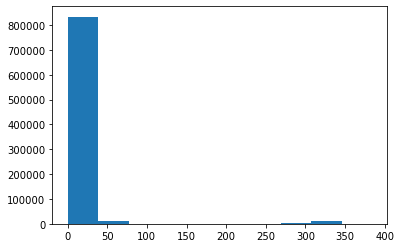

In [8]:
plt.hist(l_degrees)

In [26]:
in_degrees = {i[1]:i[0] for i in G.in_degree()}
max_in_degree = max(in_degrees.keys())
id_max_in_degree = in_degrees[max(in_degrees.keys())]

id_max_in_degree
type_max_in_degree = get_type_node(G,id_max_in_degree)
# l_type_max_in_degree.append(type_max_in_degree)
rehash_dict[type_max_in_degree]

[{'source_group': 68, 'destination_group': 7}, {'source_group': 68, 'destination_group': 17}, {'source_group': 68, 'destination_group': 68}, {'source_group': 68, 'destination_group': 68}, {'source_group': 68, 'destination_group': 68}, {'source_group': 68, 'destination_group': 68}, {'source_group': 68, 'destination_group': 68}, {'source_group': 68, 'destination_group': 68}, {'source_group': 68, 'destination_group': 68}, {'source_group': 68, 'destination_group': 68}, {'source_group': 68, 'destination_group': 68}, {'source_group': 68, 'destination_group': 68}, {'source_group': 68, 'destination_group': 68}, {'source_group': 68, 'destination_group': 68}, {'source_group': 68, 'destination_group': 68}, {'source_group': 68, 'destination_group': 68}, {'source_group': 68, 'destination_group': 68}, {'source_group': 68, 'destination_group': 68}, {'source_group': 68, 'destination_group': 68}, {'source_group': 68, 'destination_group': 68}, {'source_group': 68, 'destination_group': 68}, {'source_grou

'[20,30), Overig, Man, 3'

In [118]:
g.reciprocity()

0.004432430950335423

In [ ]:
g.diameter()


In [19]:
df = pd.read_csv(f'./Data/NW_data/huishouden_nw_b=0.csv')


FileNotFoundError: [Errno 2] No such file or directory: './Data/NW_data/huishouden_nw_b=0.csv'

In [17]:

df2 =  pd.read_csv(f'./Data/NW_data/familie_nw_b=0_1_reciprocity.csv')


FileNotFoundError: [Errno 2] No such file or directory: './Data/NW_data/familie_nw_b=0_1_reciprocity.csv'

In [34]:
n_df = pd.concat([df, df2, df3])

In [6]:
n_df.head()

NameError: name 'n_df' is not defined

In [36]:
g = ig.Graph.TupleList(n_df[['source_id','destination_id']].itertuples(index=False), directed=True, weights=False)

In [21]:
edge_list = g.get_edgelist()

In [24]:
edge_list = np.array(edge_list)

In [27]:
max(edge_list.flatten())

802930

In [28]:
rn = np.random.randint(802930, size=(100,2))

x = rn[:,0]
y = rn[:,1]

In [29]:
sp = g.shortest_paths(x, y, mode='in')

In [33]:
sp = np.array(sp)

sp1 = sp.copy()
sp1[sp == np.inf] = 20
# sp = sp.flatten()

# np.mean(sp1)
# # list(sp).count(np.inf)
# # len(sp)

np.mean(sp1.flatten())

8.0138

8.1632

In [25]:
len(g.clusters('strong')[0])

2

In [2]:
df = pd.read_csv('all_values.csv')

In [39]:
df

,Unnamed: 0,Data/NW_data2\buren_nw_b=0_0_reciprocity.csv,Data/NW_data2\buren_nw_barabasi=0_spatial.csv,Data/NW_data2\buren_nw_barabasi=1_100_percentage_0.5_reciprocity.csv,Data/NW_data2\buren_nw_barabasi=1_100_percentage_0_reciprocity.csv,Data/NW_data2\buren_nw_barabasi=1_10_percentage_0.5_reciprocity.csv,Data/NW_data2\buren_nw_barabasi=1_10_percentage_0_reciprocity.csv,Data/NW_data2\buren_nw_barabasi=1_1_percentage_0.5_reciprocity.csv,Data/NW_data2\buren_nw_barabasi=1_1_percentage_0_reciprocity.csv,Data/NW_data2\buren_nw_barabasi=1_1_percentage_1_reciprocity.csv,...,Data/NW_data2\werkschool_nw_barabasi=1_100_percentage_0_reciprocity.csv,Data/NW_data2\werkschool_nw_barabasi=1_10_percentage_0.5_reciprocity.csv,Data/NW_data2\werkschool_nw_barabasi=1_10_percentage_0_reciprocity.csv,Data/NW_data2\werkschool_nw_barabasi=1_1_percentage_0.5_reciprocity.csv,Data/NW_data2\werkschool_nw_barabasi=1_1_percentage_0_reciprocity.csv,Data/NW_data2\werkschool_nw_barabasi=1_1_percentage_1_reciprocity.csv,Data/NW_data2\werkschool_nw_barabasi=1_50_percentage_0.5_reciprocity.csv,Data/NW_data2\werkschool_nw_barabasi=1_50_percentage_0_reciprocity.csv,Data/NW_data2\werkschool_nw_barabasi=1_5_percentage_0.5_reciprocity.csv,Data/NW_data2\werkschool_nw_barabasi=1_5_percentage_0_reciprocity.csv
0,Connected nodes,8.601900e+05,8.601480e+05,860157.000000,860157.000000,8.599190e+05,859970.000000,859827.000000,8.598120e+05,859816.000000,...,8.114010e+05,810300.000000,8.103500e+05,808400.000000,808335.000000,808408.000000,8.112460e+05,8.112730e+05,8.097910e+05,8.097660e+05
1,Shortest path,inf,inf,4.257800,4.731400,inf,4.785100,4.248200,inf,3.963300,...,inf,3.812700,inf,3.864000,4.158200,3.639500,inf,inf,inf,inf
2,Shortest path2,5.616000e+00,9.688200e+00,4.257800,4.731400,5.218700e+00,4.785100,4.248200,6.756200e+00,3.963300,...,6.113400e+00,3.812700,6.048300e+00,3.864000,4.158200,3.639500,5.761700e+00,8.919500e+00,5.790300e+00,6.089800e+00
3,Assortativity,9.404163e-01,9.413774e-01,0.932237,0.922721,9.230751e-01,0.905312,0.910105,8.825498e-01,0.916592,...,1.787071e-01,0.165316,1.533481e-01,0.122122,0.119542,0.122011,1.884543e-01,1.723705e-01,1.541266e-01,1.440313e-01
4,Reciprocity,4.432431e-03,7.925256e-02,0.667819,0.004467,6.677678e-01,0.004463,0.667749,4.421738e-03,1.000000,...,1.781187e-04,0.666659,1.857474e-04,0.666561,0.000179,1.000000,6.668132e-01,1.822736e-04,6.667143e-01,1.873822e-04


In [45]:
 df_buren = df. iloc[:, 0:17]

In [40]:
df_buren[(df_buren['Unnamed: 0'] == 'Shortest path2') | (df_buren['Unnamed: 0'] == 'Reciprocity')]

,Unnamed: 0,Data/NW_data2\buren_nw_b=0_0_reciprocity.csv,Data/NW_data2\buren_nw_barabasi=0_spatial.csv,Data/NW_data2\buren_nw_barabasi=1_100_percentage_0.5_reciprocity.csv,Data/NW_data2\buren_nw_barabasi=1_100_percentage_0_reciprocity.csv,Data/NW_data2\buren_nw_barabasi=1_10_percentage_0.5_reciprocity.csv,Data/NW_data2\buren_nw_barabasi=1_10_percentage_0_reciprocity.csv,Data/NW_data2\buren_nw_barabasi=1_1_percentage_0.5_reciprocity.csv,Data/NW_data2\buren_nw_barabasi=1_1_percentage_0_reciprocity.csv,Data/NW_data2\buren_nw_barabasi=1_1_percentage_1_reciprocity.csv,Data/NW_data2\buren_nw_barabasi=1_50_percentage_0.5_reciprocity.csv,Data/NW_data2\buren_nw_barabasi=1_50_percentage_0_reciprocity.csv,Data/NW_data2\buren_nw_barabasi=1_5_percentage_0.5_reciprocity.csv,Data/NW_data2\buren_nw_barabasi=1_5_percentage_0_reciprocity.csv,Data/NW_data2\buren_nw_barabasi=1_5_percentage_1_reciprocity.csv
2,Shortest path2,5.616000,9.688200,4.257800,4.731400,5.218700,4.785100,4.248200,6.756200,3.9633,4.21750,4.763900,6.159700,5.721100,5.8159
4,Reciprocity,0.004432,0.079253,0.667819,0.004467,0.667768,0.004463,0.667749,0.004422,1.0000,0.66787,0.004472,0.667644,0.004424,1.0000


In [47]:
df

,Unnamed: 0,Data/NW_data2\buren_nw_b=0_0_reciprocity.csv,Data/NW_data2\buren_nw_barabasi=0_spatial.csv,Data/NW_data2\buren_nw_barabasi=1_100_percentage_0.5_reciprocity.csv,Data/NW_data2\buren_nw_barabasi=1_100_percentage_0_reciprocity.csv,Data/NW_data2\buren_nw_barabasi=1_10_percentage_0.5_reciprocity.csv,Data/NW_data2\buren_nw_barabasi=1_10_percentage_0_reciprocity.csv,Data/NW_data2\buren_nw_barabasi=1_1_percentage_0.5_reciprocity.csv,Data/NW_data2\buren_nw_barabasi=1_1_percentage_0_reciprocity.csv,Data/NW_data2\buren_nw_barabasi=1_1_percentage_1_reciprocity.csv,...,Data/NW_data2\werkschool_nw_barabasi=1_100_percentage_0_reciprocity.csv,Data/NW_data2\werkschool_nw_barabasi=1_10_percentage_0.5_reciprocity.csv,Data/NW_data2\werkschool_nw_barabasi=1_10_percentage_0_reciprocity.csv,Data/NW_data2\werkschool_nw_barabasi=1_1_percentage_0.5_reciprocity.csv,Data/NW_data2\werkschool_nw_barabasi=1_1_percentage_0_reciprocity.csv,Data/NW_data2\werkschool_nw_barabasi=1_1_percentage_1_reciprocity.csv,Data/NW_data2\werkschool_nw_barabasi=1_50_percentage_0.5_reciprocity.csv,Data/NW_data2\werkschool_nw_barabasi=1_50_percentage_0_reciprocity.csv,Data/NW_data2\werkschool_nw_barabasi=1_5_percentage_0.5_reciprocity.csv,Data/NW_data2\werkschool_nw_barabasi=1_5_percentage_0_reciprocity.csv
0,Connected nodes,8.601900e+05,8.601480e+05,860157.000000,860157.000000,8.599190e+05,859970.000000,859827.000000,8.598120e+05,859816.000000,...,8.114010e+05,810300.000000,8.103500e+05,808400.000000,808335.000000,808408.000000,8.112460e+05,8.112730e+05,8.097910e+05,8.097660e+05
1,Shortest path,inf,inf,4.257800,4.731400,inf,4.785100,4.248200,inf,3.963300,...,inf,3.812700,inf,3.864000,4.158200,3.639500,inf,inf,inf,inf
2,Shortest path2,5.616000e+00,9.688200e+00,4.257800,4.731400,5.218700e+00,4.785100,4.248200,6.756200e+00,3.963300,...,6.113400e+00,3.812700,6.048300e+00,3.864000,4.158200,3.639500,5.761700e+00,8.919500e+00,5.790300e+00,6.089800e+00
3,Assortativity,9.404163e-01,9.413774e-01,0.932237,0.922721,9.230751e-01,0.905312,0.910105,8.825498e-01,0.916592,...,1.787071e-01,0.165316,1.533481e-01,0.122122,0.119542,0.122011,1.884543e-01,1.723705e-01,1.541266e-01,1.440313e-01
4,Reciprocity,4.432431e-03,7.925256e-02,0.667819,0.004467,6.677678e-01,0.004463,0.667749,4.421738e-03,1.000000,...,1.781187e-04,0.666659,1.857474e-04,0.666561,0.000179,1.000000,6.668132e-01,1.822736e-04,6.667143e-01,1.873822e-04


In [52]:
 df_buren = df. iloc[:, 19:-1]

In [53]:
df_buren

,Data/NW_data2\werkschool_nw_b=0.csv,Data/NW_data2\werkschool_nw_barabasi=1_100_percentage_0.5_reciprocity.csv,Data/NW_data2\werkschool_nw_barabasi=1_100_percentage_0_reciprocity.csv,Data/NW_data2\werkschool_nw_barabasi=1_10_percentage_0.5_reciprocity.csv,Data/NW_data2\werkschool_nw_barabasi=1_10_percentage_0_reciprocity.csv,Data/NW_data2\werkschool_nw_barabasi=1_1_percentage_0.5_reciprocity.csv,Data/NW_data2\werkschool_nw_barabasi=1_1_percentage_0_reciprocity.csv,Data/NW_data2\werkschool_nw_barabasi=1_1_percentage_1_reciprocity.csv,Data/NW_data2\werkschool_nw_barabasi=1_50_percentage_0.5_reciprocity.csv,Data/NW_data2\werkschool_nw_barabasi=1_50_percentage_0_reciprocity.csv,Data/NW_data2\werkschool_nw_barabasi=1_5_percentage_0.5_reciprocity.csv
0,8.023700e+05,811363.000000,8.114010e+05,810300.000000,8.103500e+05,808400.000000,808335.000000,808408.000000,8.112460e+05,8.112730e+05,8.097910e+05
1,inf,3.819600,inf,3.812700,inf,3.864000,4.158200,3.639500,inf,inf,inf
2,3.229830e+01,3.819600,6.113400e+00,3.812700,6.048300e+00,3.864000,4.158200,3.639500,5.761700e+00,8.919500e+00,5.790300e+00
3,1.109439e-01,0.196428,1.787071e-01,0.165316,1.533481e-01,0.122122,0.119542,0.122011,1.884543e-01,1.723705e-01,1.541266e-01
4,1.205047e-04,0.666762,1.781187e-04,0.666659,1.857474e-04,0.666561,0.000179,1.000000,6.668132e-01,1.822736e-04,6.667143e-01


In [14]:
df = pd.read_stata('Data/Houshold_data/hhi2019en_1.0.dta')

# df[:10]Data\Household_data\hhi2019en_1.0.dta

FileNotFoundError: [Errno 2] No such file or directory: 'Data/Houshold_data/hhi2019en_1.0.dta'

2.8323309640969563
10
HBO (eerste of tweede fase) / vocational colleges 2
HAVO/VWO / pre-university education 1
Voorbereidend middelbaar beroepsonderwijs (VMBO) / pre-vocational education 1
MBO of het leerlingwezen / senior vocational training or training through appren 3
Kleuter-, lager- of basisonderwijs / kindergarten/primary education 2
Wetenschappelijk onderwijs WO / university education 1
(Voortgezet) speciaal onderwijs / (continued) special education 1
Did not have education (yet) 1
other sort of education/training 1


<AxesSubplot:xlabel='age_category', ylabel='Count'>

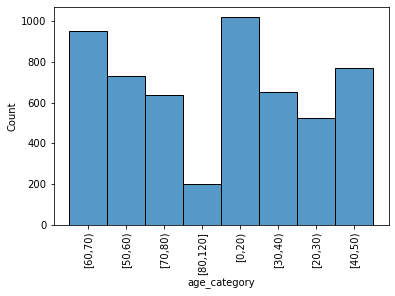

In [6]:
import re
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt


df_nodes = pd.read_csv('../Data/tab_n(with oplniv).csv')

age_categories = sorted(df_nodes.lft.unique())

age_categories
df = pd.read_stata('../Data/Household_data/hhi2019en_1.0.dta')

s = pd.Series(df['aantalhh'], dtype="Float64")


df['aantalhh2'] = df['aantalhh'].str.extract('(\d+)').astype(int)

df['age'] =  2019 - df['gebjaar']

# df = df[df['regio'] == 'Three largest cities']
# sn.histplot(data = df, x = 'aantalhh2', stat = 'probability', bins = 12)






plt.xticks(rotation=90)
print(df['aantalhh2'].mean())
df['education'] = df.oplmet

print(len(df.oplmet.unique()))

education_dict = {}
t = (2,1,1,3,2,1,1,1, 1)
for i, j in zip(df.oplmet.unique(), t):
    education_dict[i] = j
    print(i, j)
    
    
df['education'] = df['education'].replace(education_dict)

df.education.unique()




age_category_values = []

for i in df['age']:
    if i >=0 and i<21:
        age_category_values.append(age_categories[0])
    elif i <31:
        age_category_values.append(age_categories[1])
    elif i < 41:
        age_category_values.append(age_categories[2])
    elif i < 51:
        age_category_values.append(age_categories[3])
    elif i < 61:
        age_category_values.append(age_categories[4])
    elif i < 71:
        age_category_values.append(age_categories[5])
    elif i < 81:
        age_category_values.append(age_categories[6])
    else:
        age_category_values.append(age_categories[7])
        
age_category_values

df['age_category'] = age_category_values

df = df.replace({'Female': 'Vrouw', 'Male': 'Man'})

df['education'] = df['education'].fillna(1)
# Data\Houshold_data\DHS_household_.csv
df = df[['nohhold', 'geslacht', 'aantalhh', 'aantalki', 'positie','aantalhh2', 'age_category', 'education', 'age']]
df.to_csv('../Data/Household_data/DHS_household_.csv')
sn.histplot(data = df, x = 'age_category')

In [5]:
df

,nohhold,geslacht,aantalhh,aantalki,positie,aantalhh2,age_category,education,age
0,6.0,Man,2 people,none,head of the household,2,"[60,70)",2.0,63.0
1,6.0,Vrouw,2 people,none,spouse,2,"[50,60)",1.0,59.0
2,21.0,Man,2 people,none,head of the household,2,"[70,80)",1.0,77.0
3,21.0,Vrouw,2 people,none,spouse,2,"[70,80)",1.0,74.0
4,38.0,Man,2 people,none,head of the household,2,"[80,120]",1.0,91.0
...,...,...,...,...,...,...,...,...,...
5482,89972.0,Vrouw,3 people,1 child,spouse,3,"[20,30)",3.0,29.0
5483,89972.0,Vrouw,3 people,1 child,child living at home,3,"[0,20)",1.0,4.0
5484,89975.0,Vrouw,1 person,none,head of the household,1,"[30,40)",2.0,33.0
5485,89986.0,Vrouw,2 people,none,spouse,2,"[70,80)",1.0,72.0


In [81]:
df.isna().sum()

nohhold         0
geslacht        0
aantalhh        0
aantalki        0
positie         0
aantalhh2       0
age_category    0
education       0
age             2
dtype: int64

In [104]:
import itertools
import numpy as np

d = []
s = []


h = [1,2,3,4,5]

if h:
    print('hoi')
    
    
    npalist = (np.array(list(itertools.combinations(h, 2))))
    

s.extend(npalist[:,0])
d.extend(npalist[:,1])

s.extend(npalist[:,1])
d.extend(npalist[:,0])


print(s)
print(d)

hoi
[1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 2, 3, 4, 5, 3, 4, 5, 4, 5, 5]
[2, 3, 4, 5, 3, 4, 5, 4, 5, 5, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4]
